In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import streamlit as st

data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## Data preprocessing and EDA

In [2]:
## Check the data
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
## Check the feature names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
## Load the data into Pandas DF for easy analysis
data_df = pd.DataFrame(data.data, columns=data.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
## Add the target features in the DF
data_df["target"] = data.target
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
## Check the target values distribution
## 1 - Malignant
## 0 - Benign
data_df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

<Axes: ylabel='Distribution of target values'>

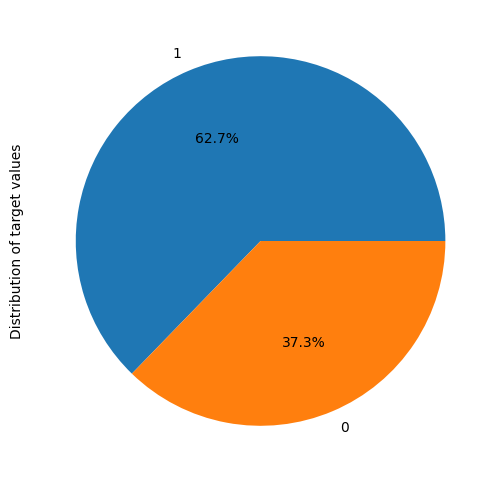

In [7]:
## Compute the percentage of the target values
target_perc = data_df["target"].value_counts(normalize=True) * 100
target_perc.plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6), ylabel="Distribution of target values")

## Bar graph of the target values
#sns.countplot(data=data_df, x="target", palette="Set1")

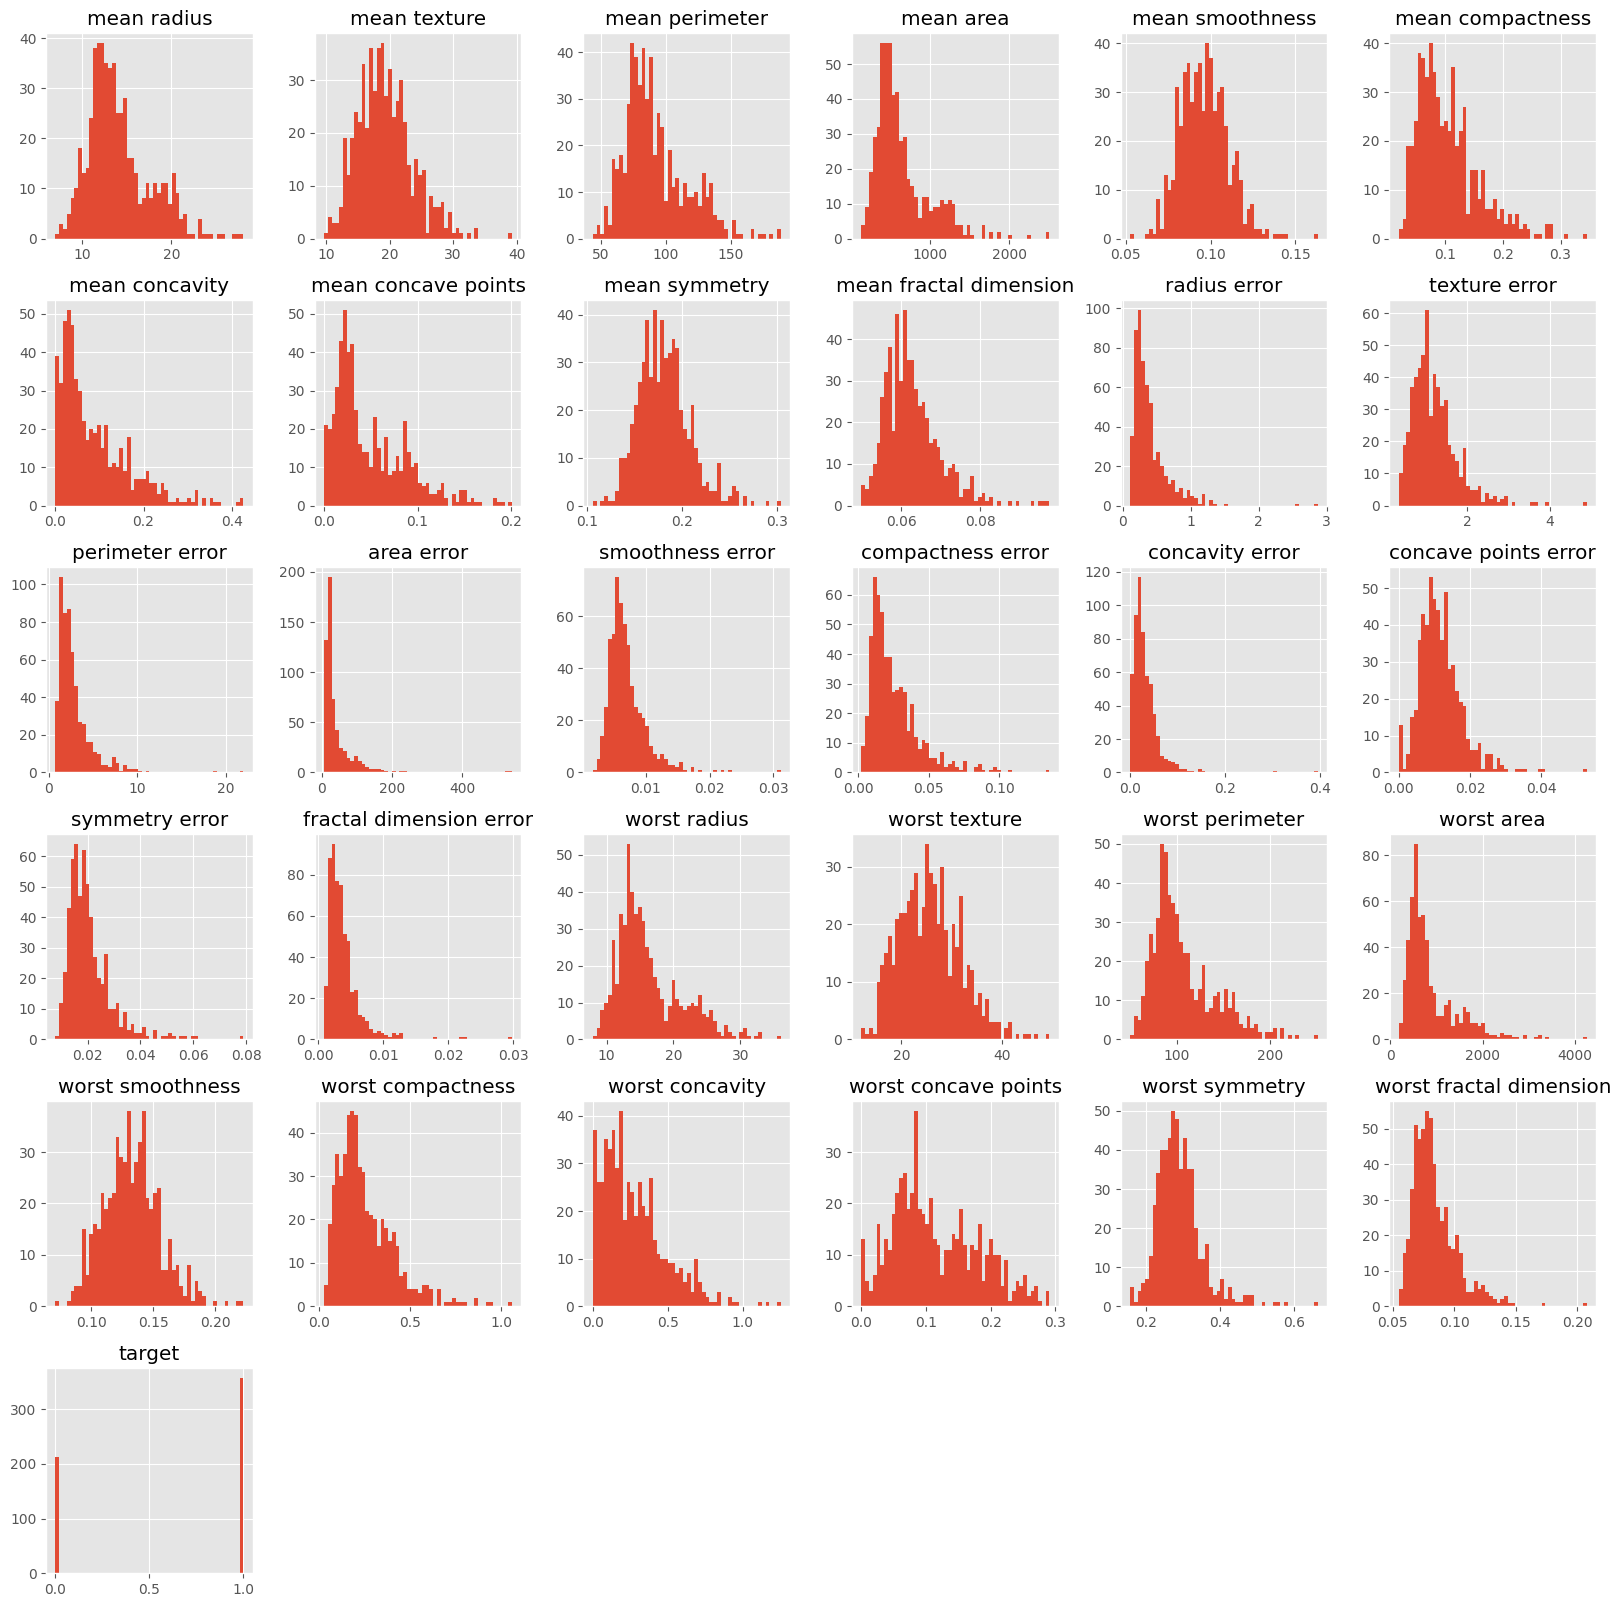

In [8]:
## Density plot of the features
plt.style.use("ggplot")
data_df.hist(bins=50, figsize=(20,20))
plt.show()

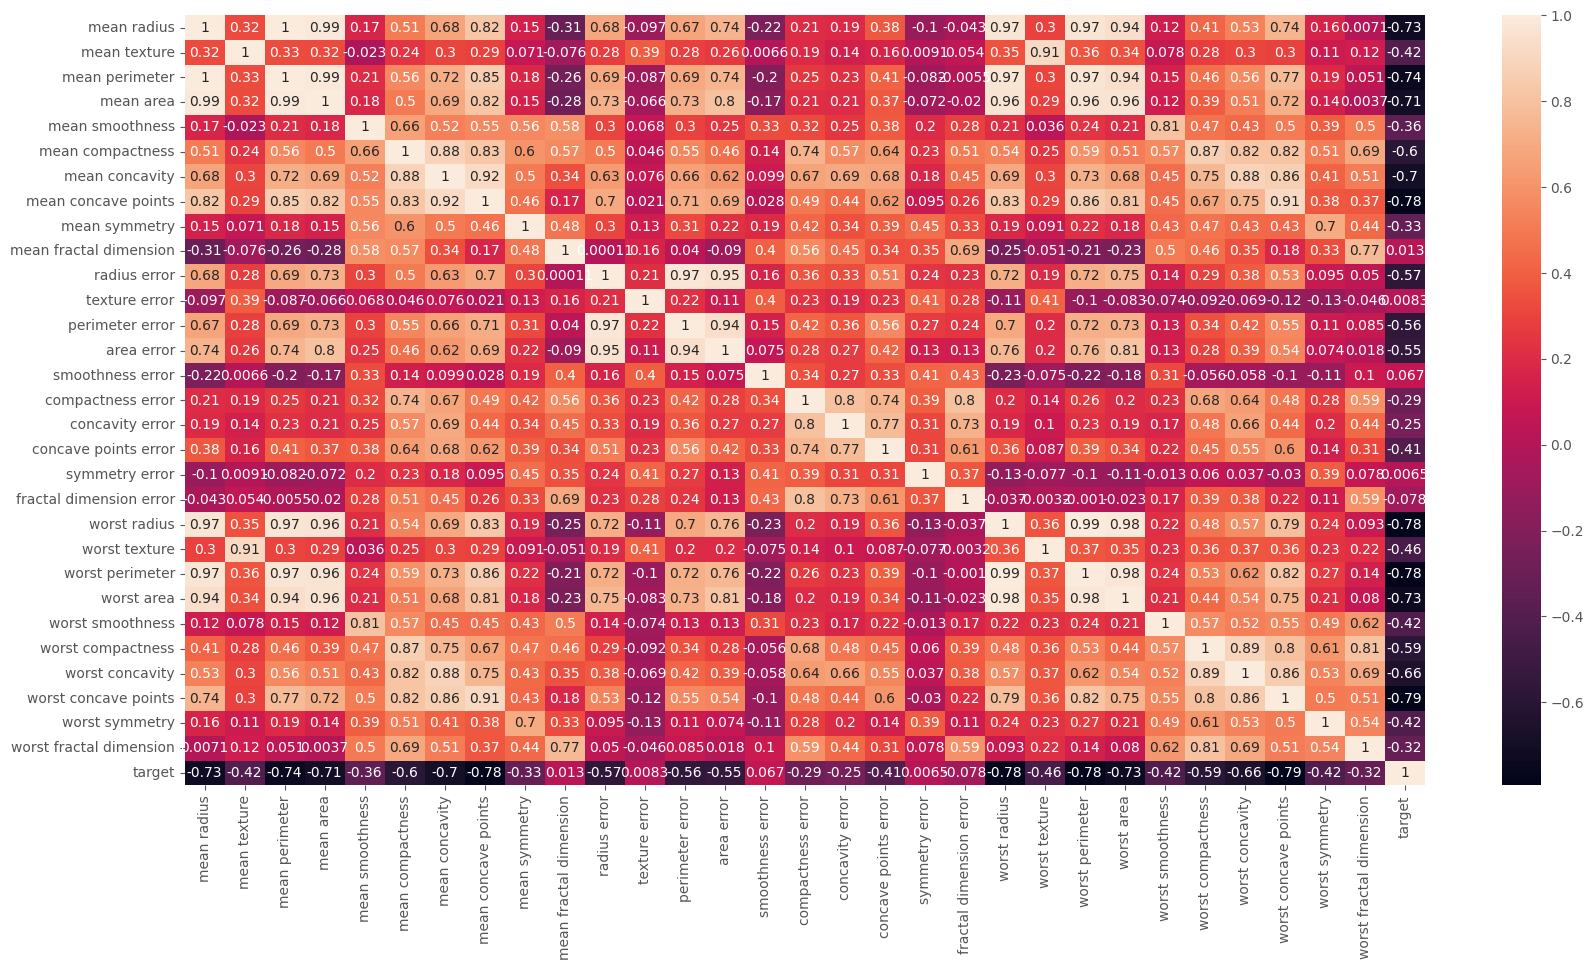

In [9]:
## Correlation of the features
plt.figure(figsize=(20,10))
sns.heatmap(data_df.corr(), annot=True)
plt.show()

## Using SKLEARN selectKBest for feature selection
* Split the features to X & y values
* Split the data into Train and Test
* Standardize the using the StandardScaler
* Select top N features using selectKBest & chi-squared test
* Train the model using Logistic Regression
* Prediction: Test the model using Logistic Regression
* Evaluate the modelby checking the accuracy
* Get and list the selected features 


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

## Split the data into X and y
X = data_df.drop("target", axis=1)
y = data_df["target"]

## Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Select the top 10 features, we're using ANOVA F-test (f_classif) since chi square doesn't allow negative values
skb = SelectKBest(score_func=f_classif, k=10)
X_train_skb = skb.fit_transform(X_train_scaled, y_train)
X_test_skb = skb.transform(X_test_scaled)

## Train the model
model = LogisticRegression()
model.fit(X_train_skb, y_train)

## Make predictions
y_pred = model.predict(X_test_skb)

## Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

## Get the selected features
selected_features = X.columns[skb.get_support()]
print("Selected features:", selected_features)


Accuracy: 97.37%
Selected features: Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


In [11]:
X_train_skb

array([[-1.44075296, -1.36208497, -1.1391179 , ..., -0.97396758,
         4.67282796,  0.9320124 ],
       [ 1.97409619,  2.09167167,  1.85197292, ...,  2.1374055 ,
         1.92862053,  2.6989469 ],
       [-1.39998202, -1.34520926, -1.10978518, ..., -0.99971493,
        -0.64491059, -0.97023893],
       ...,
       [ 0.04880192, -0.06512547, -0.06142266, ..., -0.33927781,
        -1.12796759, -1.23903365],
       [-0.03896885, -0.03137406, -0.15477966, ..., -0.01355621,
         0.63253231,  1.05001236],
       [-0.54860557, -0.60350155, -0.5518995 , ..., -0.58052694,
        -0.76538799, -0.61102866]])

In [12]:
X_train_scaled

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

### Build ANN Model with MLPClassifier (sklearn.neural_network)
* Load the data
* Assign X and y
* Split the data to Train and Test
* Scale the features using standard scaler
* Define parameter grid for MLPClassifier
* Setup Grid Search CV
* Fit Grid Search to data
* Get/List the best params
* Evaluate the model
* Extract params and metrics for the best model
* Display/Show the Training and Test accuracy score of the best model

In [13]:
## Build ANN model using MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## Data has been split and scaled in the prior steps above, so we'll proceed with MLPClassifier setup

## Parameter grid for MLPClassifier
param_grid = {
    "hidden_layer_sizes": [(10,), (50,), (100,)],
    "activation": ["tanh", "relu"],
    "solver": ["sgd", "adam"],
    "alpha": [0.0001, 0.001, 0.01, 0.05],
    "learning_rate": ["constant", "adaptive"]
}

## Initialize the MLPClassifier
mlp = MLPClassifier(max_iter=1000)

## Setup the GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)

## Fit the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

## Print the best parameters
print("Best parameters: ", grid_search.best_params_)

## Evaluate the best model on the Test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

## Extract the paramaters and metrics from the best model
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

## Print the classification report
print(classification_report(y_test, y_pred))

## Disply the Training and Test accuracy of the best model
train_accuracy = best_model.score(X_train_scaled, y_train)
test_accuracy = best_model.score(X_test_scaled, y_test)
print(f"Training accuracy: {train_accuracy}")
print(f"Testing accuracy: {test_accuracy}")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Accuracy: 98.25%
Best parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best cross-validation score: 0.9846153846153847
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Training accuracy: 0.9934065934065934
Testing accuracy: 0.9824561403508771


In [14]:
#y_pred.reshape(1,-1)
X_test_scaled

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [15]:
## Save the best model and the scaler
import pickle
#model_file = joblib.dump(best_model, 'best_model.pkl')
#scaler_file = joblib.dump(scaler, 'scaler.pkl')
with open("best_model.pkl", 'wb') as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", 'wb') as f:
    pickle.dump(scaler, f)

print(f"Best model saved")
print(f"Scaler saved")

Best model saved
Scaler saved
